## LC Preprocessing Notebook

This script demonstrates the usage of light curve preprocessing functions
defined in LC_Preprocessing.py. Each section shows how to use different
functions with example data and visualizations. 

This aimed to generate three different ideas to then be applied to the symbolic regresssion model.

- adding different types of noise (gaussian, uniform, proportional) at various levels to light curves, with visualizations of both the noisy light curves and noise distributions.
- create sparse versions of light curves using different methods (random, uniform, peak-preserving) and sparsity levels, with comparisons to the original light curves
- combine multiple light curves using different methods (sum, average, weighted average) and interpolation techniques


In [2]:
# imports

import numpy as np
import matplotlib.pyplot as plt
from LC_Preprocessing import (
    load_light_curve,
    visualize_light_curve,
    compare_light_curves,
    add_noise,
    create_sparse_lc,
    combine_light_curves,
    create_sample_light_curve,
    evaluate_noise_impact,
    evaluate_sparsity_impact,
    evaluate_combined_effects,
    dummy_sr_model
)

In [3]:
# Set random seed for reproducibility
np.random.seed(42)


Creating sample light curves...


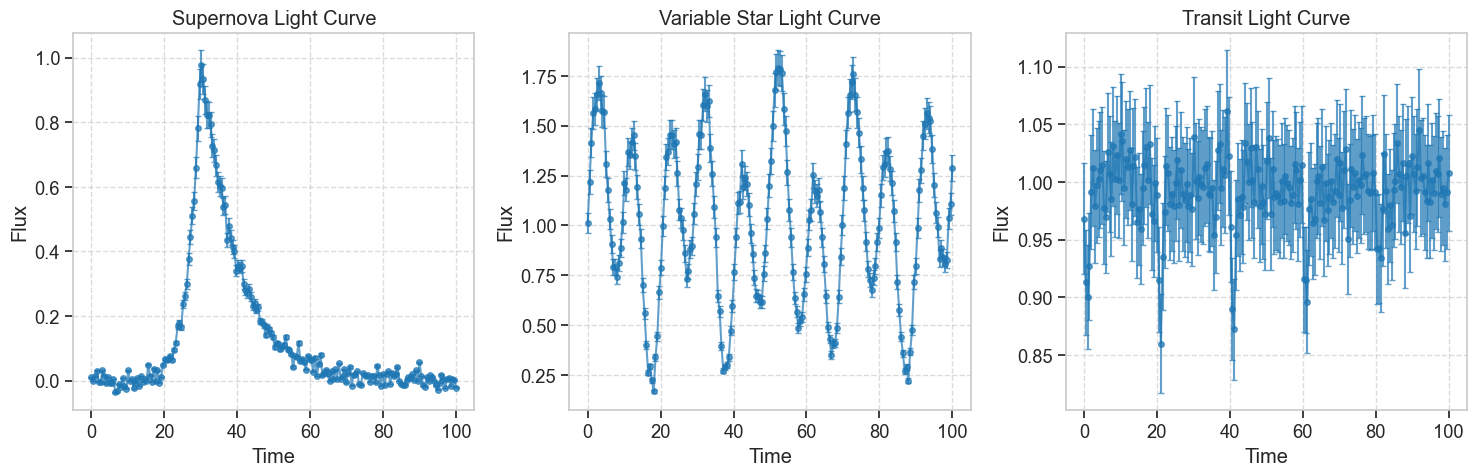

Basic light curve creation and visualization completed.


In [4]:
"Test basic light curve creation and visualization."

# Create sample light curves of different types
print("\nCreating sample light curves...")
lc_supernova = create_sample_light_curve(n_points=200, curve_type='supernova')
lc_variable = create_sample_light_curve(n_points=200, curve_type='variable_star')
lc_transit = create_sample_light_curve(n_points=200, curve_type='transit')

# Visualize each type
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
visualize_light_curve(lc_supernova, "Supernova Light Curve", axes[0])
visualize_light_curve(lc_variable, "Variable Star Light Curve", axes[1])
visualize_light_curve(lc_transit, "Transit Light Curve", axes[2])
plt.tight_layout()
plt.show()

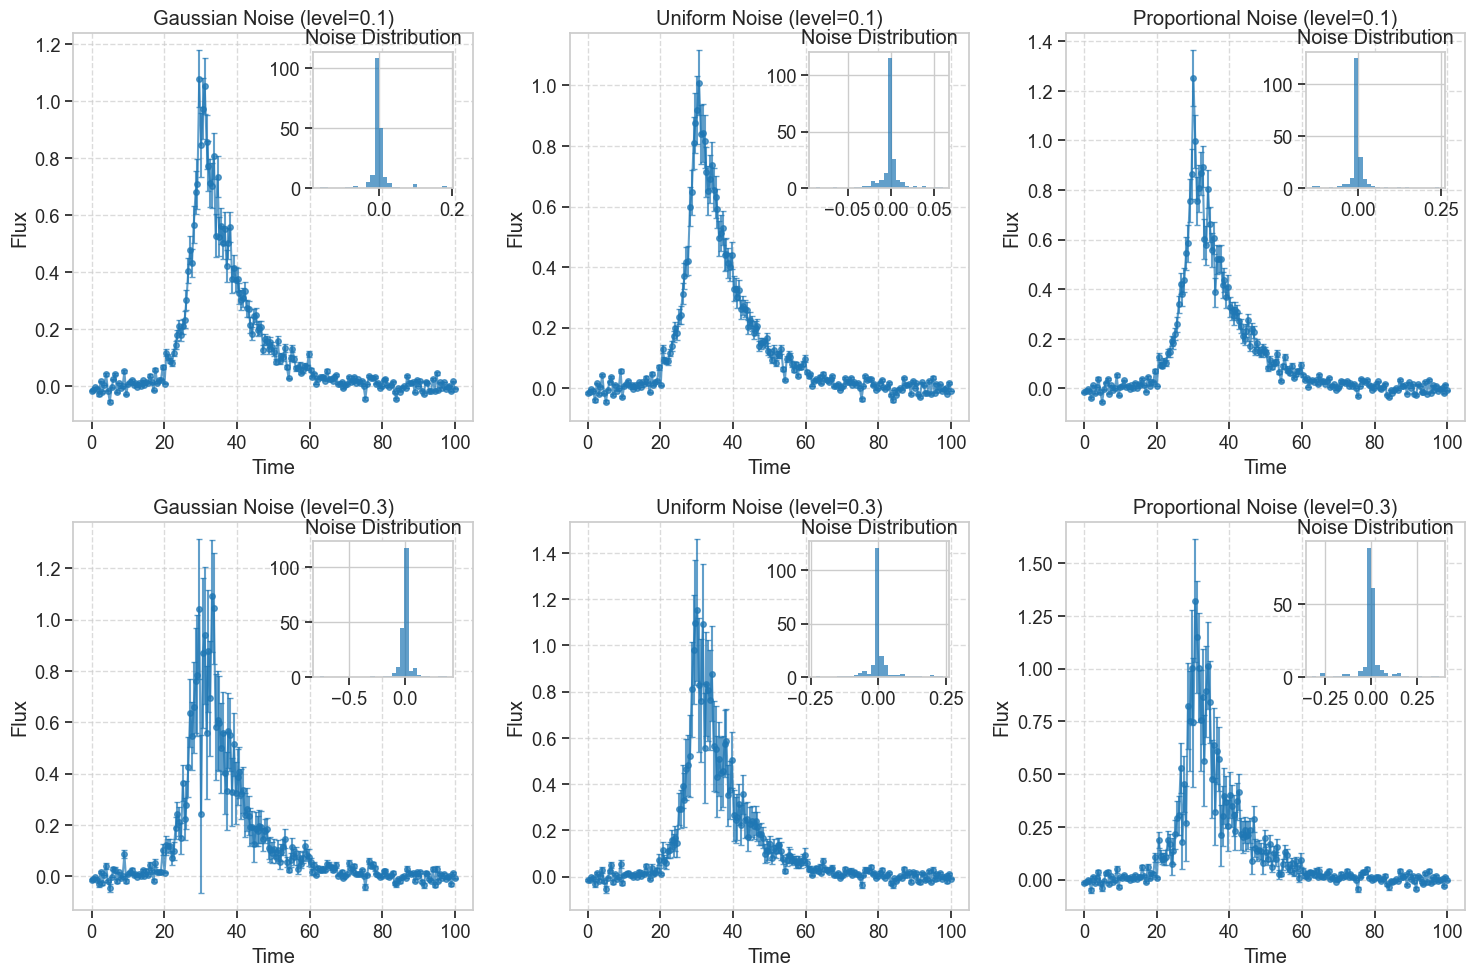

In [7]:
"Test adding different types of noise to light curves."
# Create a sample light curve
original_lc = create_sample_light_curve(n_points=200, curve_type='supernova')

# Test different noise types and levels
noise_types = ['gaussian', 'uniform', 'proportional']
noise_levels = [0.1, 0.3]

fig, axes = plt.subplots(len(noise_levels), len(noise_types), figsize=(15, 10))

for i, level in enumerate(noise_levels):
    for j, noise_type in enumerate(noise_types):
        noisy_lc = add_noise(original_lc, noise_level=level, noise_type=noise_type)
        ax = axes[i, j]
        visualize_light_curve(noisy_lc, f"{noise_type.capitalize()} Noise (level={level})", ax)
        
        # Add inset showing noise distribution
        noise = noisy_lc['flux'] - original_lc['flux']
        inset_ax = ax.inset_axes([0.6, 0.6, 0.35, 0.35])
        inset_ax.hist(noise, bins=30, alpha=0.7)
        inset_ax.set_title('Noise Distribution')

plt.tight_layout()
plt.show()

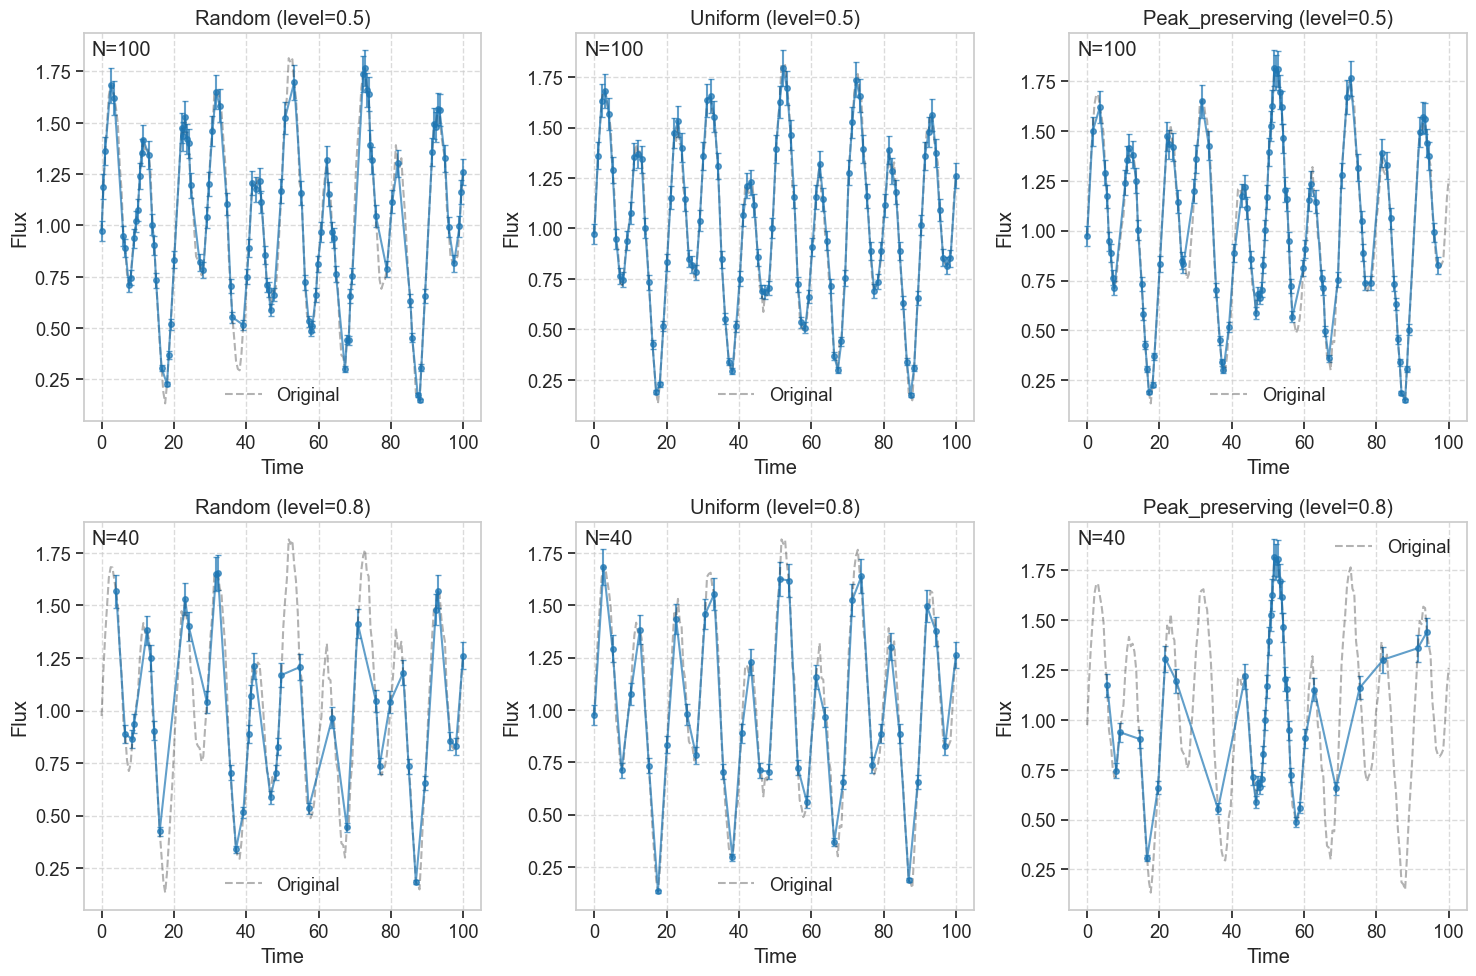

In [10]:
"Test creating sparse versions of light curves."

# Create a sample light curve
original_lc = create_sample_light_curve(n_points=200, curve_type='variable_star')

# Test different sparsity methods and levels
methods = ['random', 'uniform', 'peak_preserving']
sparsity_levels = [0.5, 0.8]

fig, axes = plt.subplots(len(sparsity_levels), len(methods), figsize=(15, 10))

for i, level in enumerate(sparsity_levels):
    for j, method in enumerate(methods):
        sparse_lc = create_sparse_lc(original_lc, sparsity_level=level, method=method)
        ax = axes[i, j]
        visualize_light_curve(sparse_lc, f"{method.capitalize()} (level={level})", ax)
        ax.plot(original_lc['time'], original_lc['flux'], 'k--', alpha=0.3, label='Original')
        ax.text(0.02, 0.98, f'N={len(sparse_lc)}', transform=ax.transAxes, 
                verticalalignment='top')
        ax.legend()

plt.tight_layout()
plt.show()


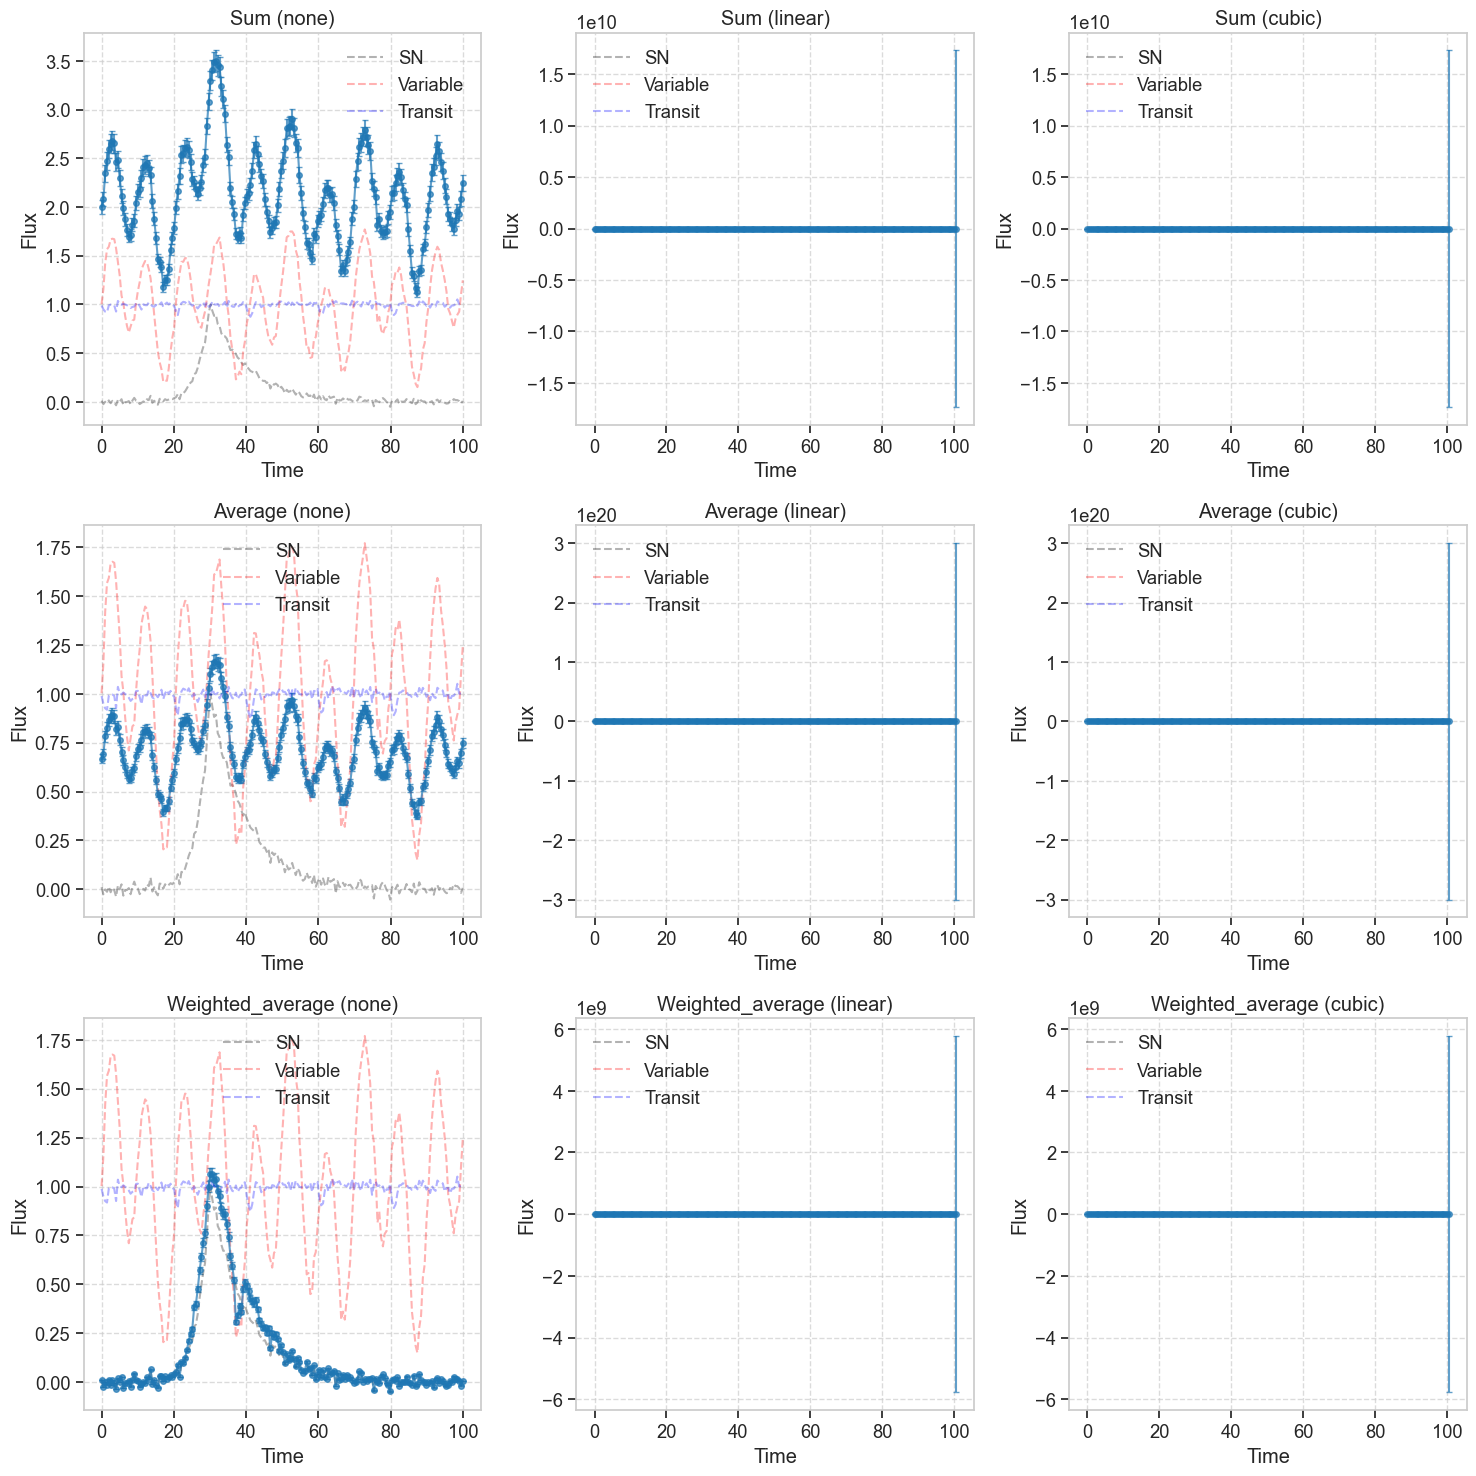

Light curve combination tests completed.


In [12]:
"Test combining multiple light curves."
# Create sample light curves
lc1 = create_sample_light_curve(n_points=200, curve_type='supernova')
lc2 = create_sample_light_curve(n_points=200, curve_type='variable_star')
lc3 = create_sample_light_curve(n_points=200, curve_type='transit')

# Test different combination methods and interpolation
methods = ['sum', 'average', 'weighted_average']
interpolations = [None, 'linear', 'cubic']

fig, axes = plt.subplots(len(methods), len(interpolations), figsize=(15, 15))

for i, method in enumerate(methods):
    for j, interp in enumerate(interpolations):
        combined_lc = combine_light_curves([lc1, lc2, lc3], method=method, 
                                            interpolation=interp)
        ax = axes[i, j]
        visualize_light_curve(combined_lc, f"{method.capitalize()} ({interp or 'none'})", ax)
        
        # Add individual light curves for comparison
        ax.plot(lc1['time'], lc1['flux'], 'k--', alpha=0.3, label='SN')
        ax.plot(lc2['time'], lc2['flux'], 'r--', alpha=0.3, label='Variable')
        ax.plot(lc3['time'], lc3['flux'], 'b--', alpha=0.3, label='Transit')
        ax.legend()

plt.tight_layout()
plt.show()

print("Light curve combination tests completed.")



In [13]:
"""
Test evaluating the impact of preprocessing on symbolic regression.
"""
print("\n=== Testing Model Evaluation ===")

# Create a sample light curve
original_lc = create_sample_light_curve(n_points=200, curve_type='variable_star')

# Test noise impact
noise_levels = [0.1, 0.3]
noise_types = ['gaussian', 'uniform']
noise_results = evaluate_noise_impact(original_lc, noise_levels, noise_types, 
                                    dummy_sr_model, n_repeats=2)
print("\nNoise Impact Results:")
print(noise_results)

# Test sparsity impact
sparsity_levels = [0.3, 0.6]
sparsity_methods = ['random', 'uniform']
sparsity_results = evaluate_sparsity_impact(original_lc, sparsity_levels, 
                                            sparsity_methods, dummy_sr_model, n_repeats=2)
print("\nSparsity Impact Results:")
print(sparsity_results)

# Test combined effects
combined_results = evaluate_combined_effects(original_lc, sparsity_levels, 
                                            noise_levels, dummy_sr_model)
print("\nCombined Effects Results:")
print(combined_results)

print("\nModel evaluation tests completed.")


=== Testing Model Evaluation ===

Noise Impact Results:
  noise_type  noise_level   equation  r2_score  repeat
0       none          0.0  a * x + b  0.350679       0
1   gaussian          0.1  a * x + b  0.341045       0
2   gaussian          0.1  a * x + b  0.336512       1
3   gaussian          0.3  a * x + b  0.234881       0
4   gaussian          0.3  a * x + b  0.256836       1
5    uniform          0.1  a * x + b  0.346045       0
6    uniform          0.1  a * x + b  0.353832       1
7    uniform          0.3  a * x + b  0.298601       0
8    uniform          0.3  a * x + b  0.309099       1

Sparsity Impact Results:
  sparsity_method  sparsity_level  n_points   equation  r2_score  repeat
0            none             0.0       200  a * x + b  0.350679       0
1          random             0.3       140  a * x + b  0.352429       0
2          random             0.3       140  a * x + b  0.350750       1
3          random             0.6        80  a * x + b  0.381983       0
4 